In [2]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from src.regular_tt_cross.dmrg_cross import *
from src.quantic_tt_cross.interpolators_1D import *

# N-Dimensional interpolator

In [3]:
# grid_creation
num_var = 40
subdivision = 25
temp = [np.linspace(1, 2, subdivision) for _ in range(num_var)]
grid = np.array(temp)


def test_function(x: np.ndarray) -> np.float64:
    return np.sinc(np.sum(x))


# Check that the function can be compiled:

try:
    nb.njit()(test_function)
    print("Function can be compiled!")
except:
    print("Function cannot be compiled!")

Function can be compiled!


In [4]:
ttrc_interpolator = ttrc(
    func=test_function,
    num_variables=num_var,
    grid=grid,
    maxvol_tol=1e-10,
    truncation_tol=1e-10,
    sweeps=5,
    initial_bond_guess=10,
    max_bond=20,
)

Function successfully compiled with numba.
Initialization done after time: 1.2966797351837158 seconds and 1 tries.


In [5]:
mps_ttrc = ttrc_interpolator.run()

Sweep 1
Sweep 2
Sweep 3
Sweep 4
Sweep 5


In [6]:
print("Time spent to do the whole computation =", ttrc_interpolator.total_time, "s")
print("Time spent building superblock tensors =", ttrc_interpolator.super_block_time, "s")

Time spent to do the whole computation = 28.66051983833313 s
Time spent building superblock tensors = 13.685522556304932 s


In [7]:
for t in mps_ttrc:
    print(t.shape)

(1, 25, 5)
(5, 5)
(5, 25, 5)
(5, 5)
(5, 25, 6)
(6, 6)
(6, 25, 6)
(6, 6)
(6, 25, 6)
(6, 6)
(6, 25, 6)
(6, 6)
(6, 25, 6)
(6, 6)
(6, 25, 6)
(6, 6)
(6, 25, 6)
(6, 6)
(6, 25, 6)
(6, 6)
(6, 25, 6)
(6, 6)
(6, 25, 7)
(7, 7)
(7, 25, 6)
(6, 6)
(6, 25, 6)
(6, 6)
(6, 25, 6)
(6, 6)
(6, 25, 6)
(6, 6)
(6, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 6)
(6, 6)
(6, 25, 8)
(8, 8)
(8, 25, 8)
(8, 8)
(8, 25, 7)
(7, 7)
(7, 25, 8)
(8, 8)
(8, 25, 8)
(8, 8)
(8, 25, 8)
(8, 8)
(8, 25, 7)
(7, 7)
(7, 25, 8)
(8, 8)
(8, 25, 8)
(8, 8)
(8, 25, 8)
(8, 8)
(8, 25, 8)
(8, 8)
(8, 25, 8)
(8, 8)
(8, 25, 8)
(8, 8)
(8, 25, 8)
(8, 8)
(8, 25, 8)
(8, 8)
(8, 25, 8)
(8, 8)
(8, 25, 8)
(8, 8)
(8, 25, 7)
(7, 7)
(7, 25, 6)
(6, 6)
(6, 25, 1)


# 1-D Interpolator

In [3]:
def test_func(x):
    B = 2 ** (-30)
    return np.cos(x / B) * np.cos(x / (4 * np.sqrt(5) * B)) * np.exp(-(x**2)) + 2 * np.exp(-x)

In [5]:
interval = [0, 2 ** (-23)]
d = 15

test_interpolator = ttrc_one_dim_func_interpolator(
    func=test_func, interval=interval, d=15, complex_function=False, pivot_initialization="first_n"
)

In [6]:
test_interpolator.interpolate(
    initial_bond_guess=2,
    max_bond=16,
    maxvol_tol=1e-10,
    truncation_tol=1e-10,
    sweeps=5,
)

Function not compiled with numba. Using non-compiled version.
Initialization done after time: 0.007649898529052734 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4
Sweep 5


In [7]:
test_interpolator.interpolator.bonds

array([2, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 2])

<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_153157/4265520111.py:12: SyntaxWarning: invalid escape sequence '\c'
  plt.title("Inteprolation of of $f(x) = \cos(x / 2^{-30})\cos(x / (4\sqrt{5}2^{-30}))e^{-x^2} + 2e^{-x}$")


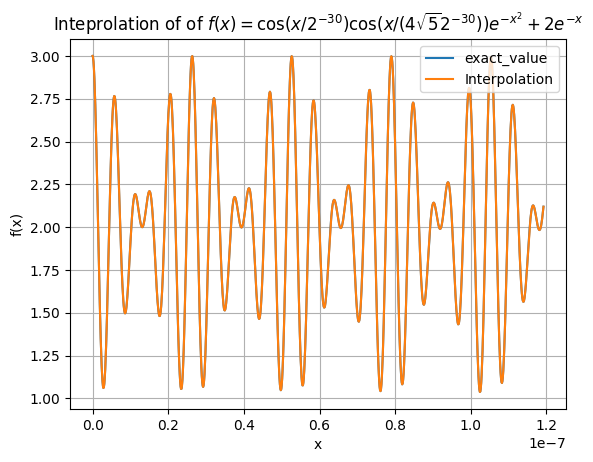

In [9]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2 ** (-23), 1000)
y = [test_func(x_i) for x_i in x]
interpolation = np.array([test_interpolator.eval(x_i) for x_i in x])

plt.plot(x, y, label="exact_value")
plt.plot(x, interpolation, label="Interpolation")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Inteprolation of of $f(x) = \cos(x / 2^{-30})\cos(x / (4\sqrt{5}2^{-30}))e^{-x^2} + 2e^{-x}$")
plt.legend()
plt.grid(True)
plt.show()